In [1]:
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
import yaml
import copy

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance_claims.csv')

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [5]:
df.replace('?', np.nan, inplace = True)


In [6]:
df.shape

(1000, 40)

In [7]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

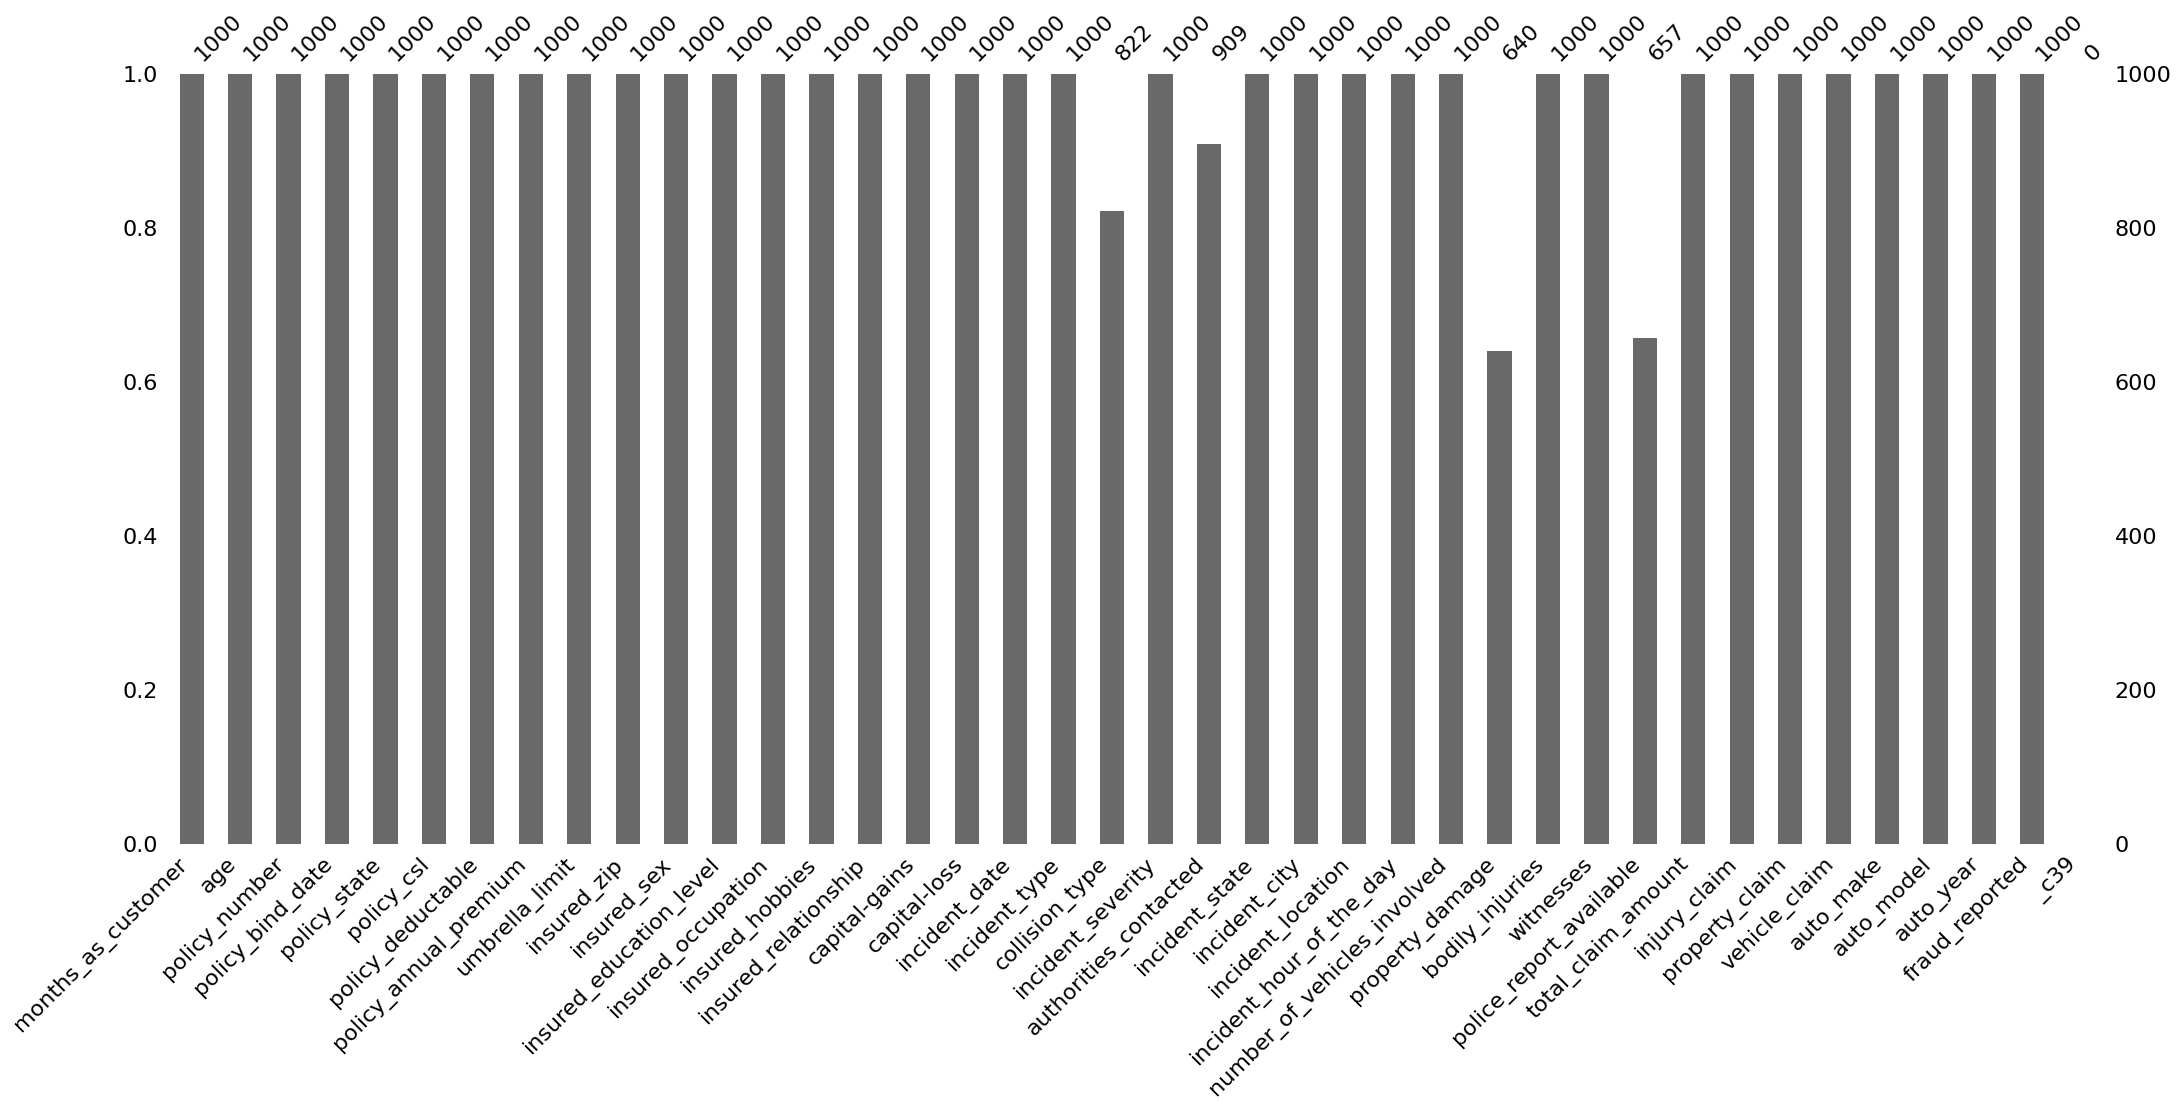

In [8]:
import missingno as msno

msno.bar(df)
plt.show()

In [9]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [10]:
cat_df = df.select_dtypes(include = ['object'])
num_df = df.select_dtypes(include = ['float64', 'int64'])



In [11]:
cat_df.head()

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,2014-10-17,OH,250/500,MALE,MD,craft-repair,sleeping,husband,2015-01-25,Single Vehicle Collision,...,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Y
1,2006-06-27,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,2015-01-21,Vehicle Theft,...,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,NaN,NaN,Mercedes,E400,Y
2,2000-09-06,OH,100/300,FEMALE,PhD,sales,board-games,own-child,2015-02-22,Multi-vehicle Collision,...,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,N
3,1990-05-25,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,2015-01-10,Single Vehicle Collision,...,Major Damage,Police,OH,Arlington,6956 Maple Drive,NaN,NO,Chevrolet,Tahoe,Y
4,2014-06-06,IL,500/1000,MALE,Associate,sales,board-games,unmarried,2015-02-17,Vehicle Theft,...,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,N


In [12]:
cat_df = cat_df.drop(['policy_bind_date', 'incident_date'], axis=1)

In [13]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

policy_state: 
['OH' 'IN' 'IL']

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_hobbies: 
['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' nan 'Rear Collision' 'Front Collision']

incident_sev

In [14]:
cat_df[['Pin_code', 'street']] = cat_df['incident_location'].str.extract(r'(^\d{4})(.*)')


In [15]:
cat_df['policy_state'], uniques = pd.factorize(cat_df['policy_state'])
cat_df['policy_csl'], uniques = pd.factorize(cat_df['policy_csl'])
cat_df['insured_sex'], uniques = pd.factorize(cat_df['insured_sex'])
cat_df['insured_education_level'], uniques = pd.factorize(cat_df['insured_education_level'])
cat_df['insured_occupation'], uniques = pd.factorize(cat_df['insured_occupation'])
cat_df['insured_hobbies'], uniques = pd.factorize(cat_df['insured_hobbies'])
cat_df['insured_relationship'], uniques = pd.factorize(cat_df['insured_relationship'])
cat_df['Pin_code'], uniques = pd.factorize(cat_df['Pin_code']) 
cat_df['auto_make'], uniques = pd.factorize(cat_df['auto_make'])
cat_df['incident_city'], uniques = pd.factorize(cat_df['incident_city'])
cat_df['fraud_reported'], uniques = pd.factorize(cat_df['fraud_reported'])
cat_df['auto_model'], uniques = pd.factorize(cat_df['auto_model'])
cat_df['property_damage'], uniques = pd.factorize(cat_df['property_damage'])
cat_df['police_report_available'], uniques = pd.factorize(cat_df['police_report_available'])
cat_df['incident_type'], uniques = pd.factorize(cat_df['incident_type'])
cat_df['collision_type'], uniques = pd.factorize(cat_df['collision_type'])
cat_df['incident_severity'], uniques = pd.factorize(cat_df['incident_severity'])


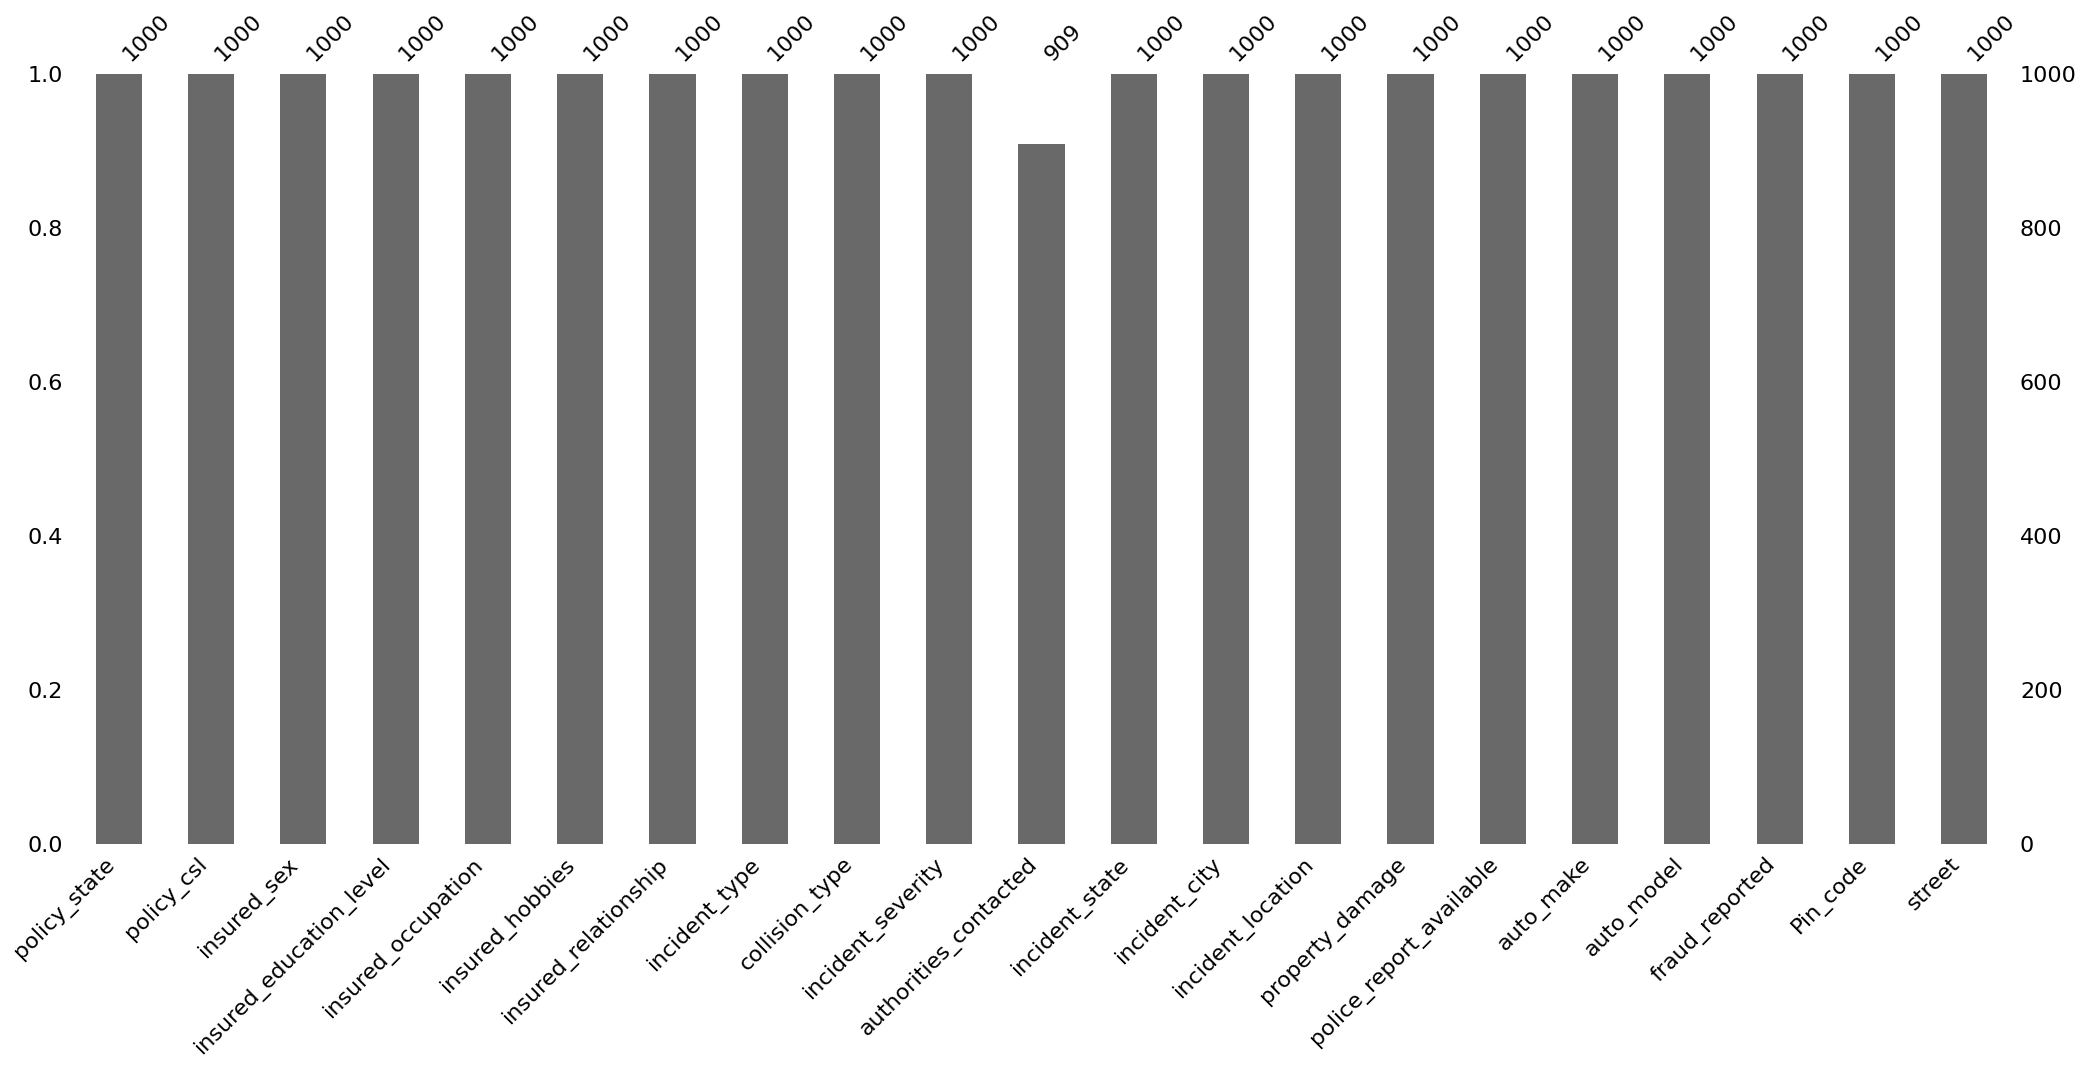

In [16]:
msno.bar(cat_df)
plt.show()

In [17]:
cat_df.police_report_available.unique()
cat_df['police_report_available'].value_counts()


police_report_available
-1    343
 1    343
 0    314
Name: count, dtype: int64

In [20]:

# Set display option to show all columns
pd.set_option('display.max_columns', None)


In [29]:

# Select numeric columns from num_df and cat_df
num_from_num_df = num_df.select_dtypes(include=['int64', 'float64'])
num_from_cat_df = cat_df.select_dtypes(include=['int64', 'float64'])

# Combine them into one DataFrame
all_numerical = pd.concat([num_from_num_df, num_from_cat_df], axis=1)

# Show the result
print("All numerical columns combined:")
print(all_numerical.head())


All numerical columns combined:
   months_as_customer  age  policy_number  policy_deductable  \
0                 328   48         521585               1000   
1                 228   42         342868               2000   
2                 134   29         687698               2000   
3                 256   41         227811               2000   
4                 228   44         367455               1000   

   policy_annual_premium  umbrella_limit  insured_zip  capital-gains  \
0                1406.91               0       466132          53300   
1                1197.22         5000000       468176              0   
2                1413.14         5000000       430632          35100   
3                1415.74         6000000       608117          48900   
4                1583.91         6000000       610706          66000   

   capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0             0                         5                            1   
1 

In [30]:
all_numerical.head()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported,Pin_code
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007,NaN,1,0,0,0,1,1,1,1,-1,1,1,-1,-1,1,1,0,1
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007,NaN,0,1,1,1,2,2,2,2,1,1,0,1,1,2,2,1,2
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014,NaN,2,0,1,1,3,2,3,0,2,0,2,-1,1,3,3,0,3
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009,NaN,2,2,0,2,2,2,3,1,-1,1,2,1,1,4,4,1,4


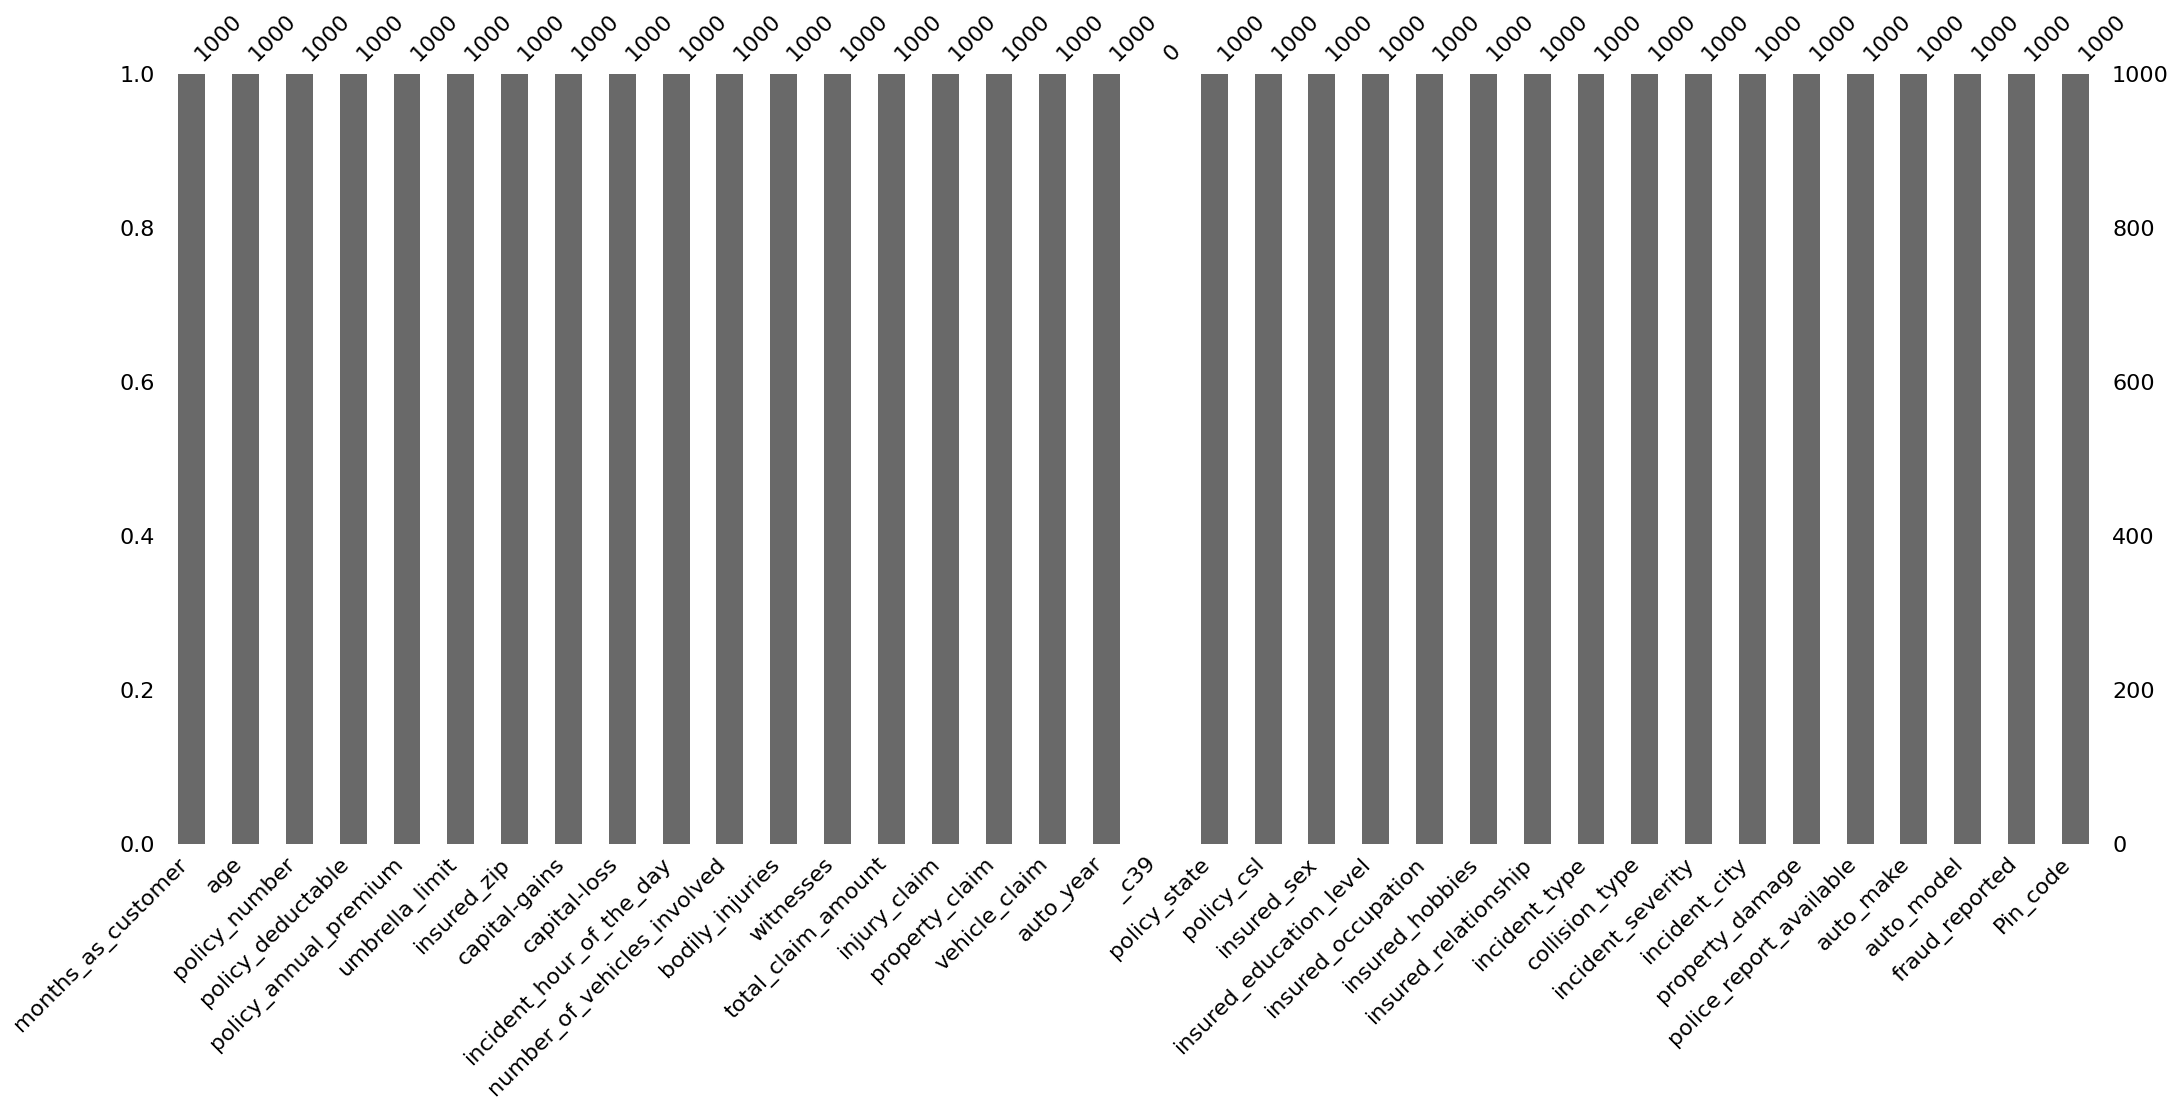

In [31]:
msno.bar(all_numerical)
plt.show()

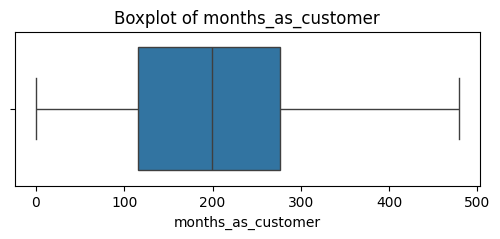

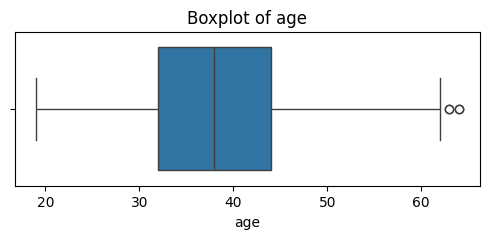

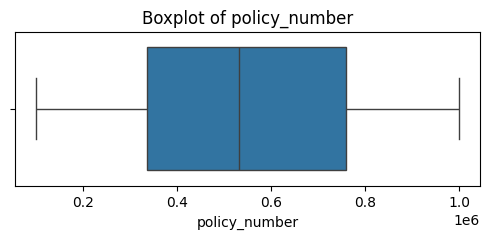

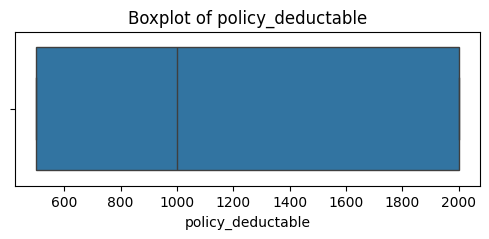

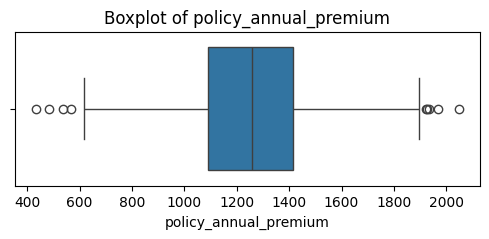

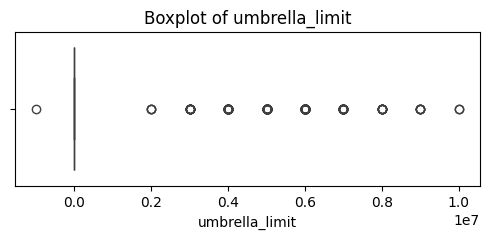

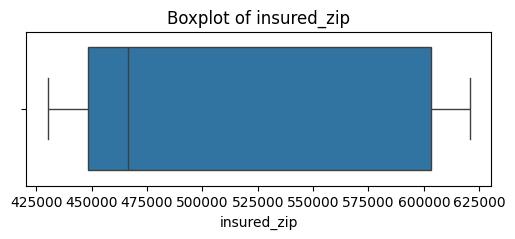

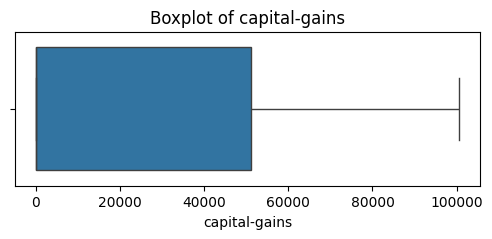

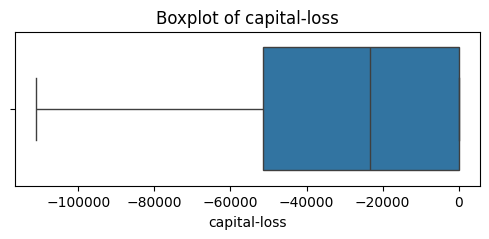

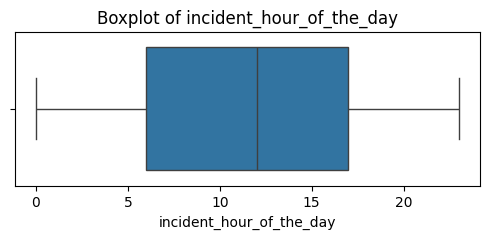

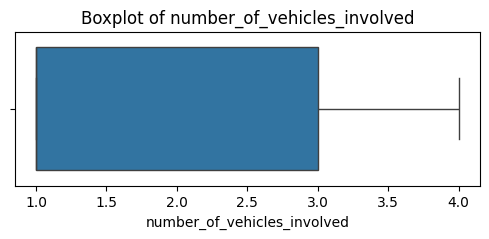

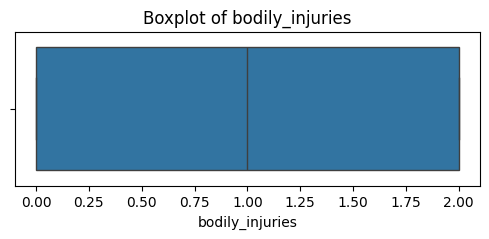

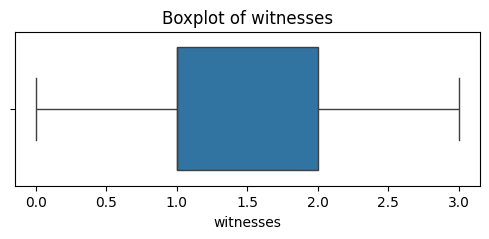

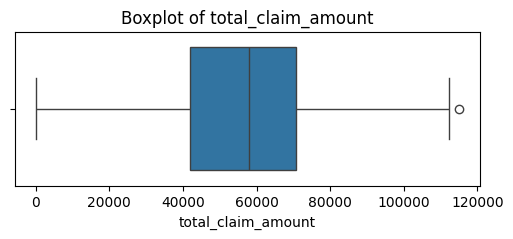

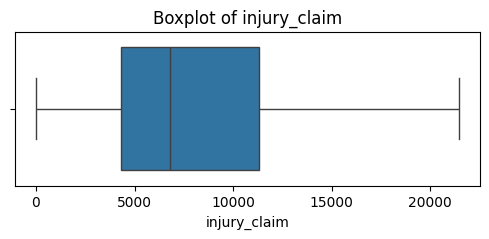

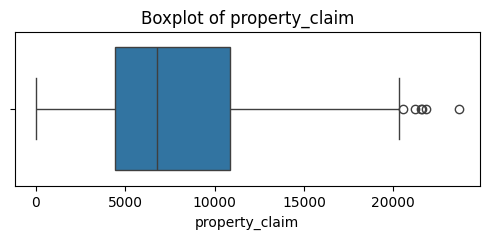

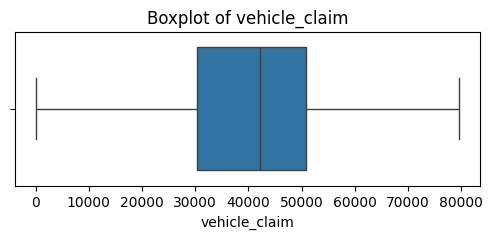

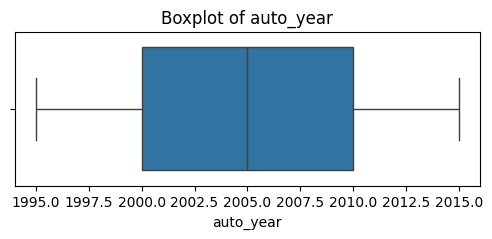

ValueError: List of boxplot statistics and `positions` values must have same the length

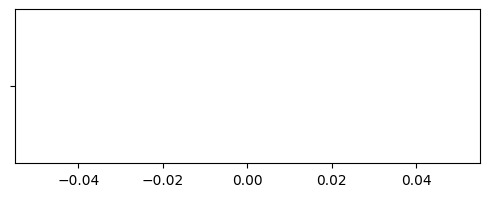

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create boxplots for each numerical column
for col in all_numerical.columns:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=all_numerical[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


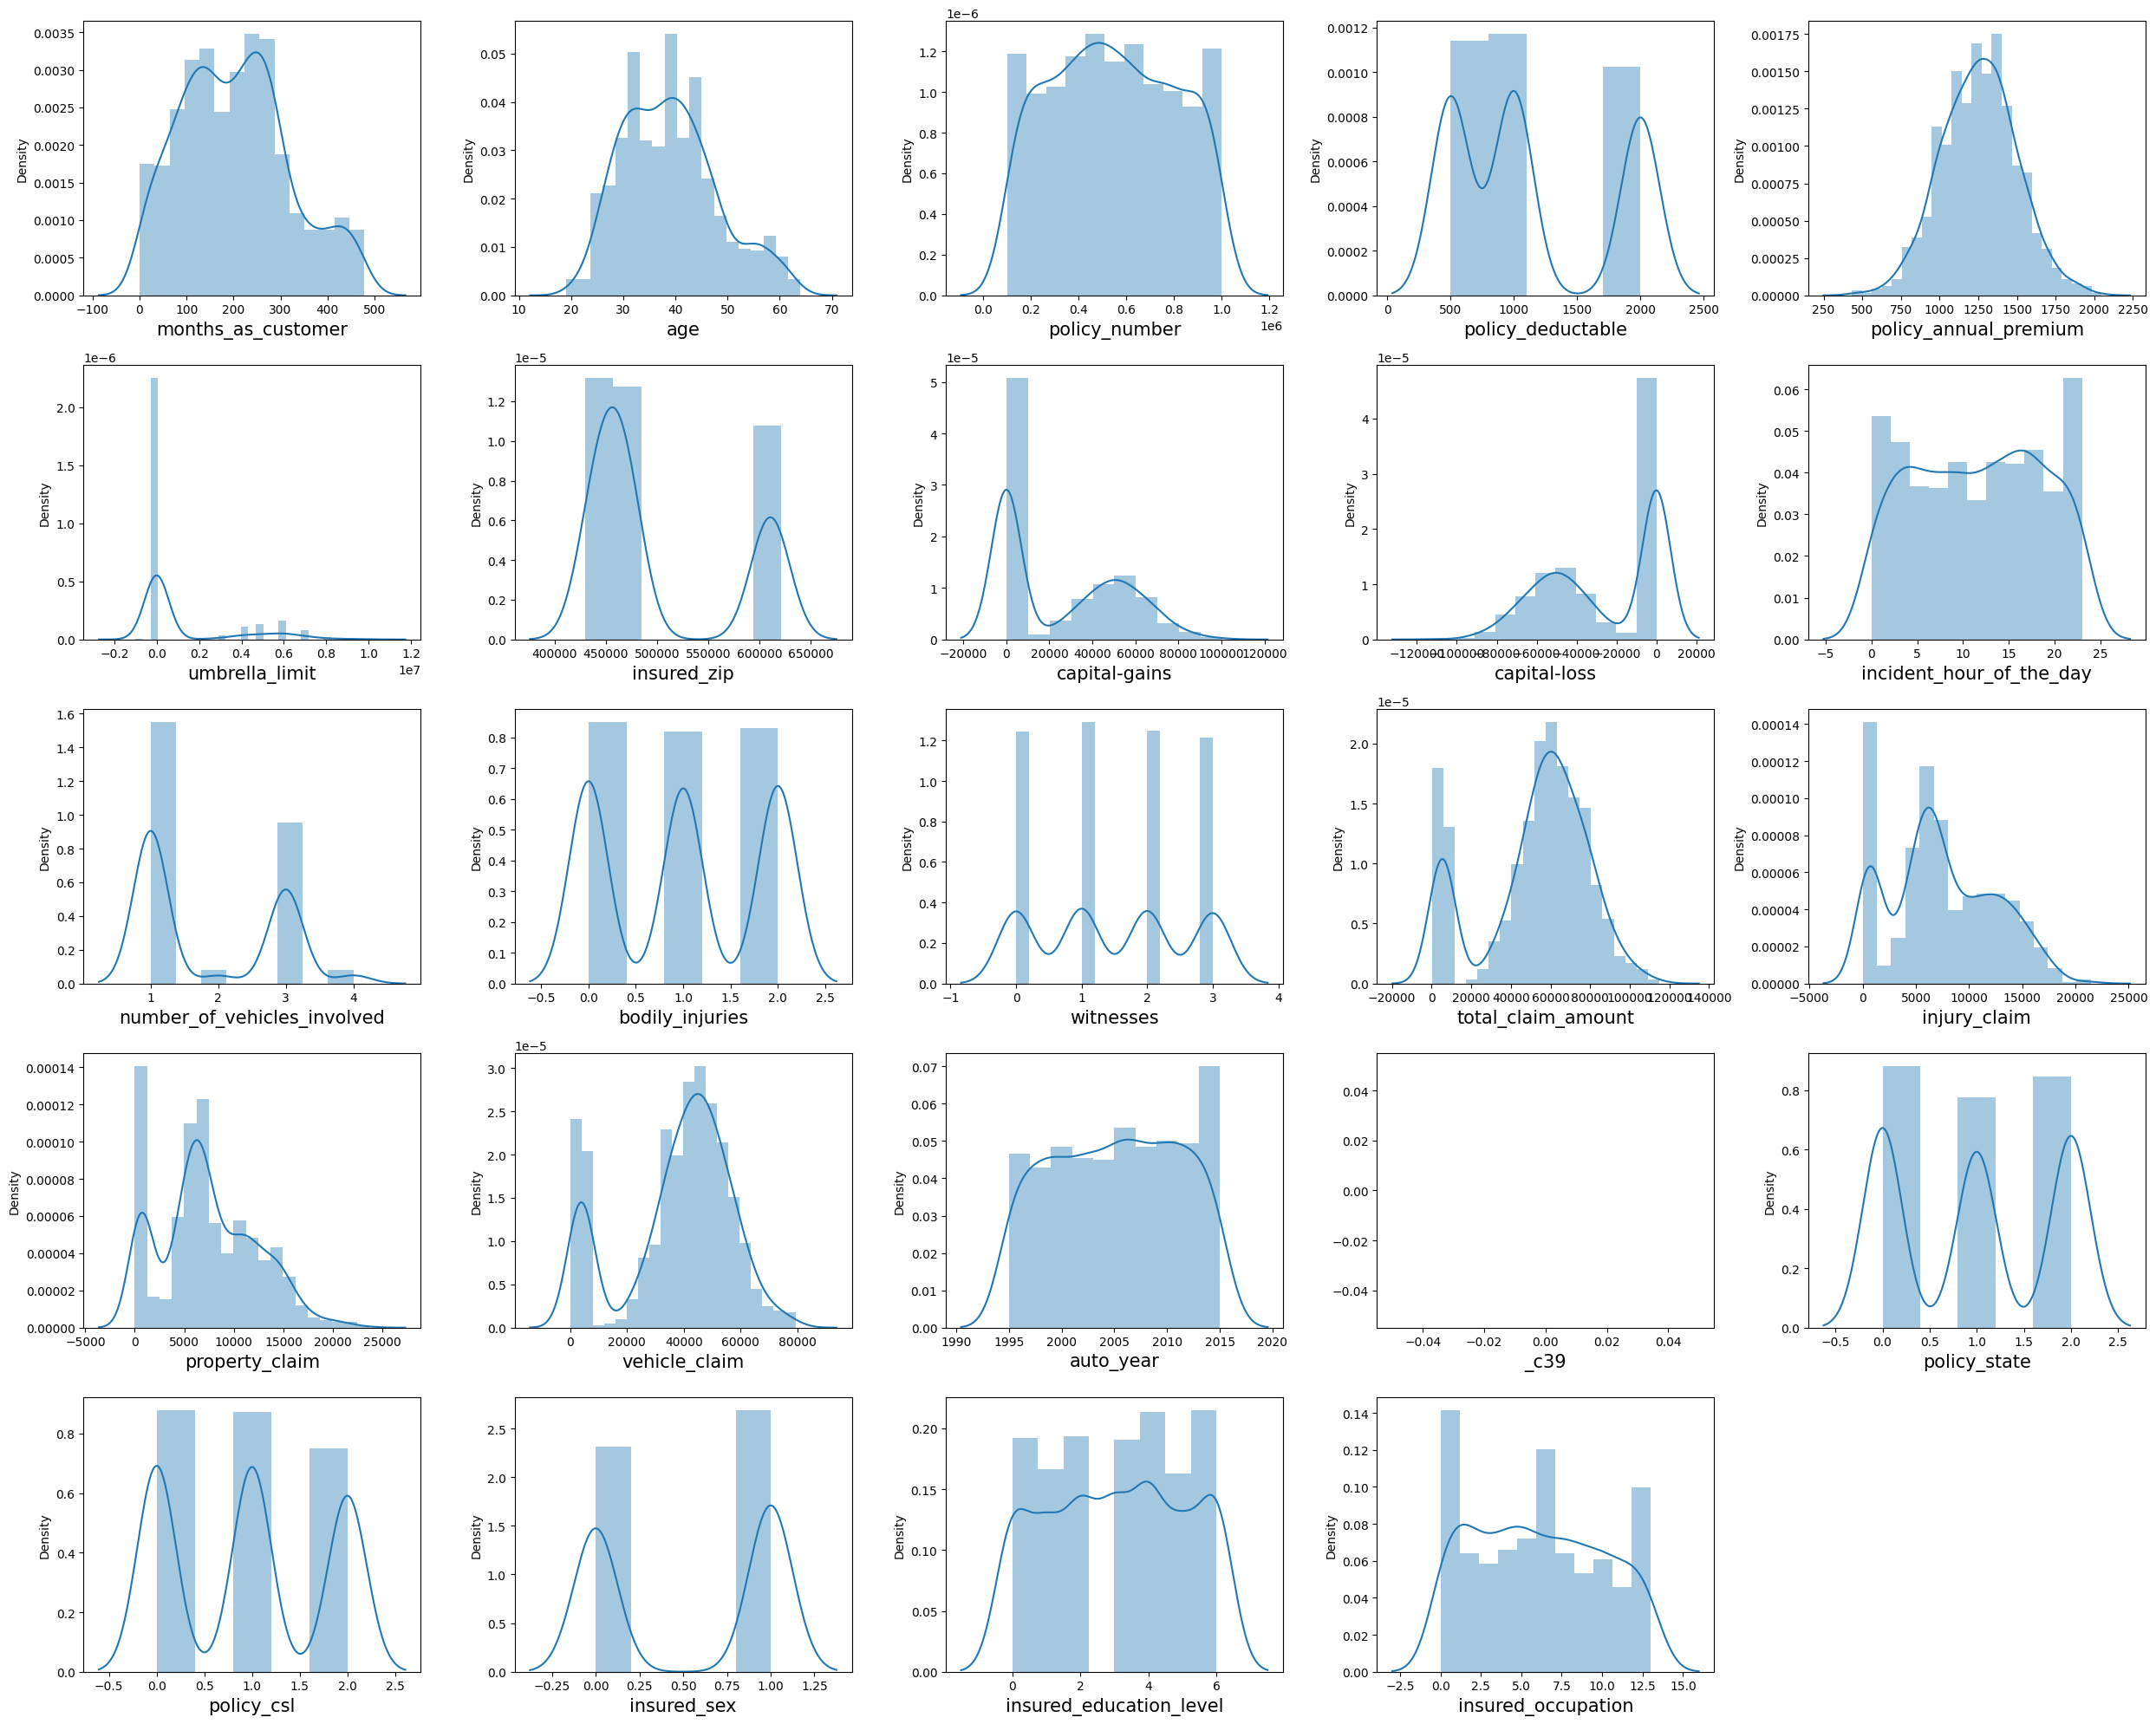

In [34]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in all_numerical.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(all_numerical[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

In [37]:
all_numerical.drop('_c39', axis=1, inplace=True)


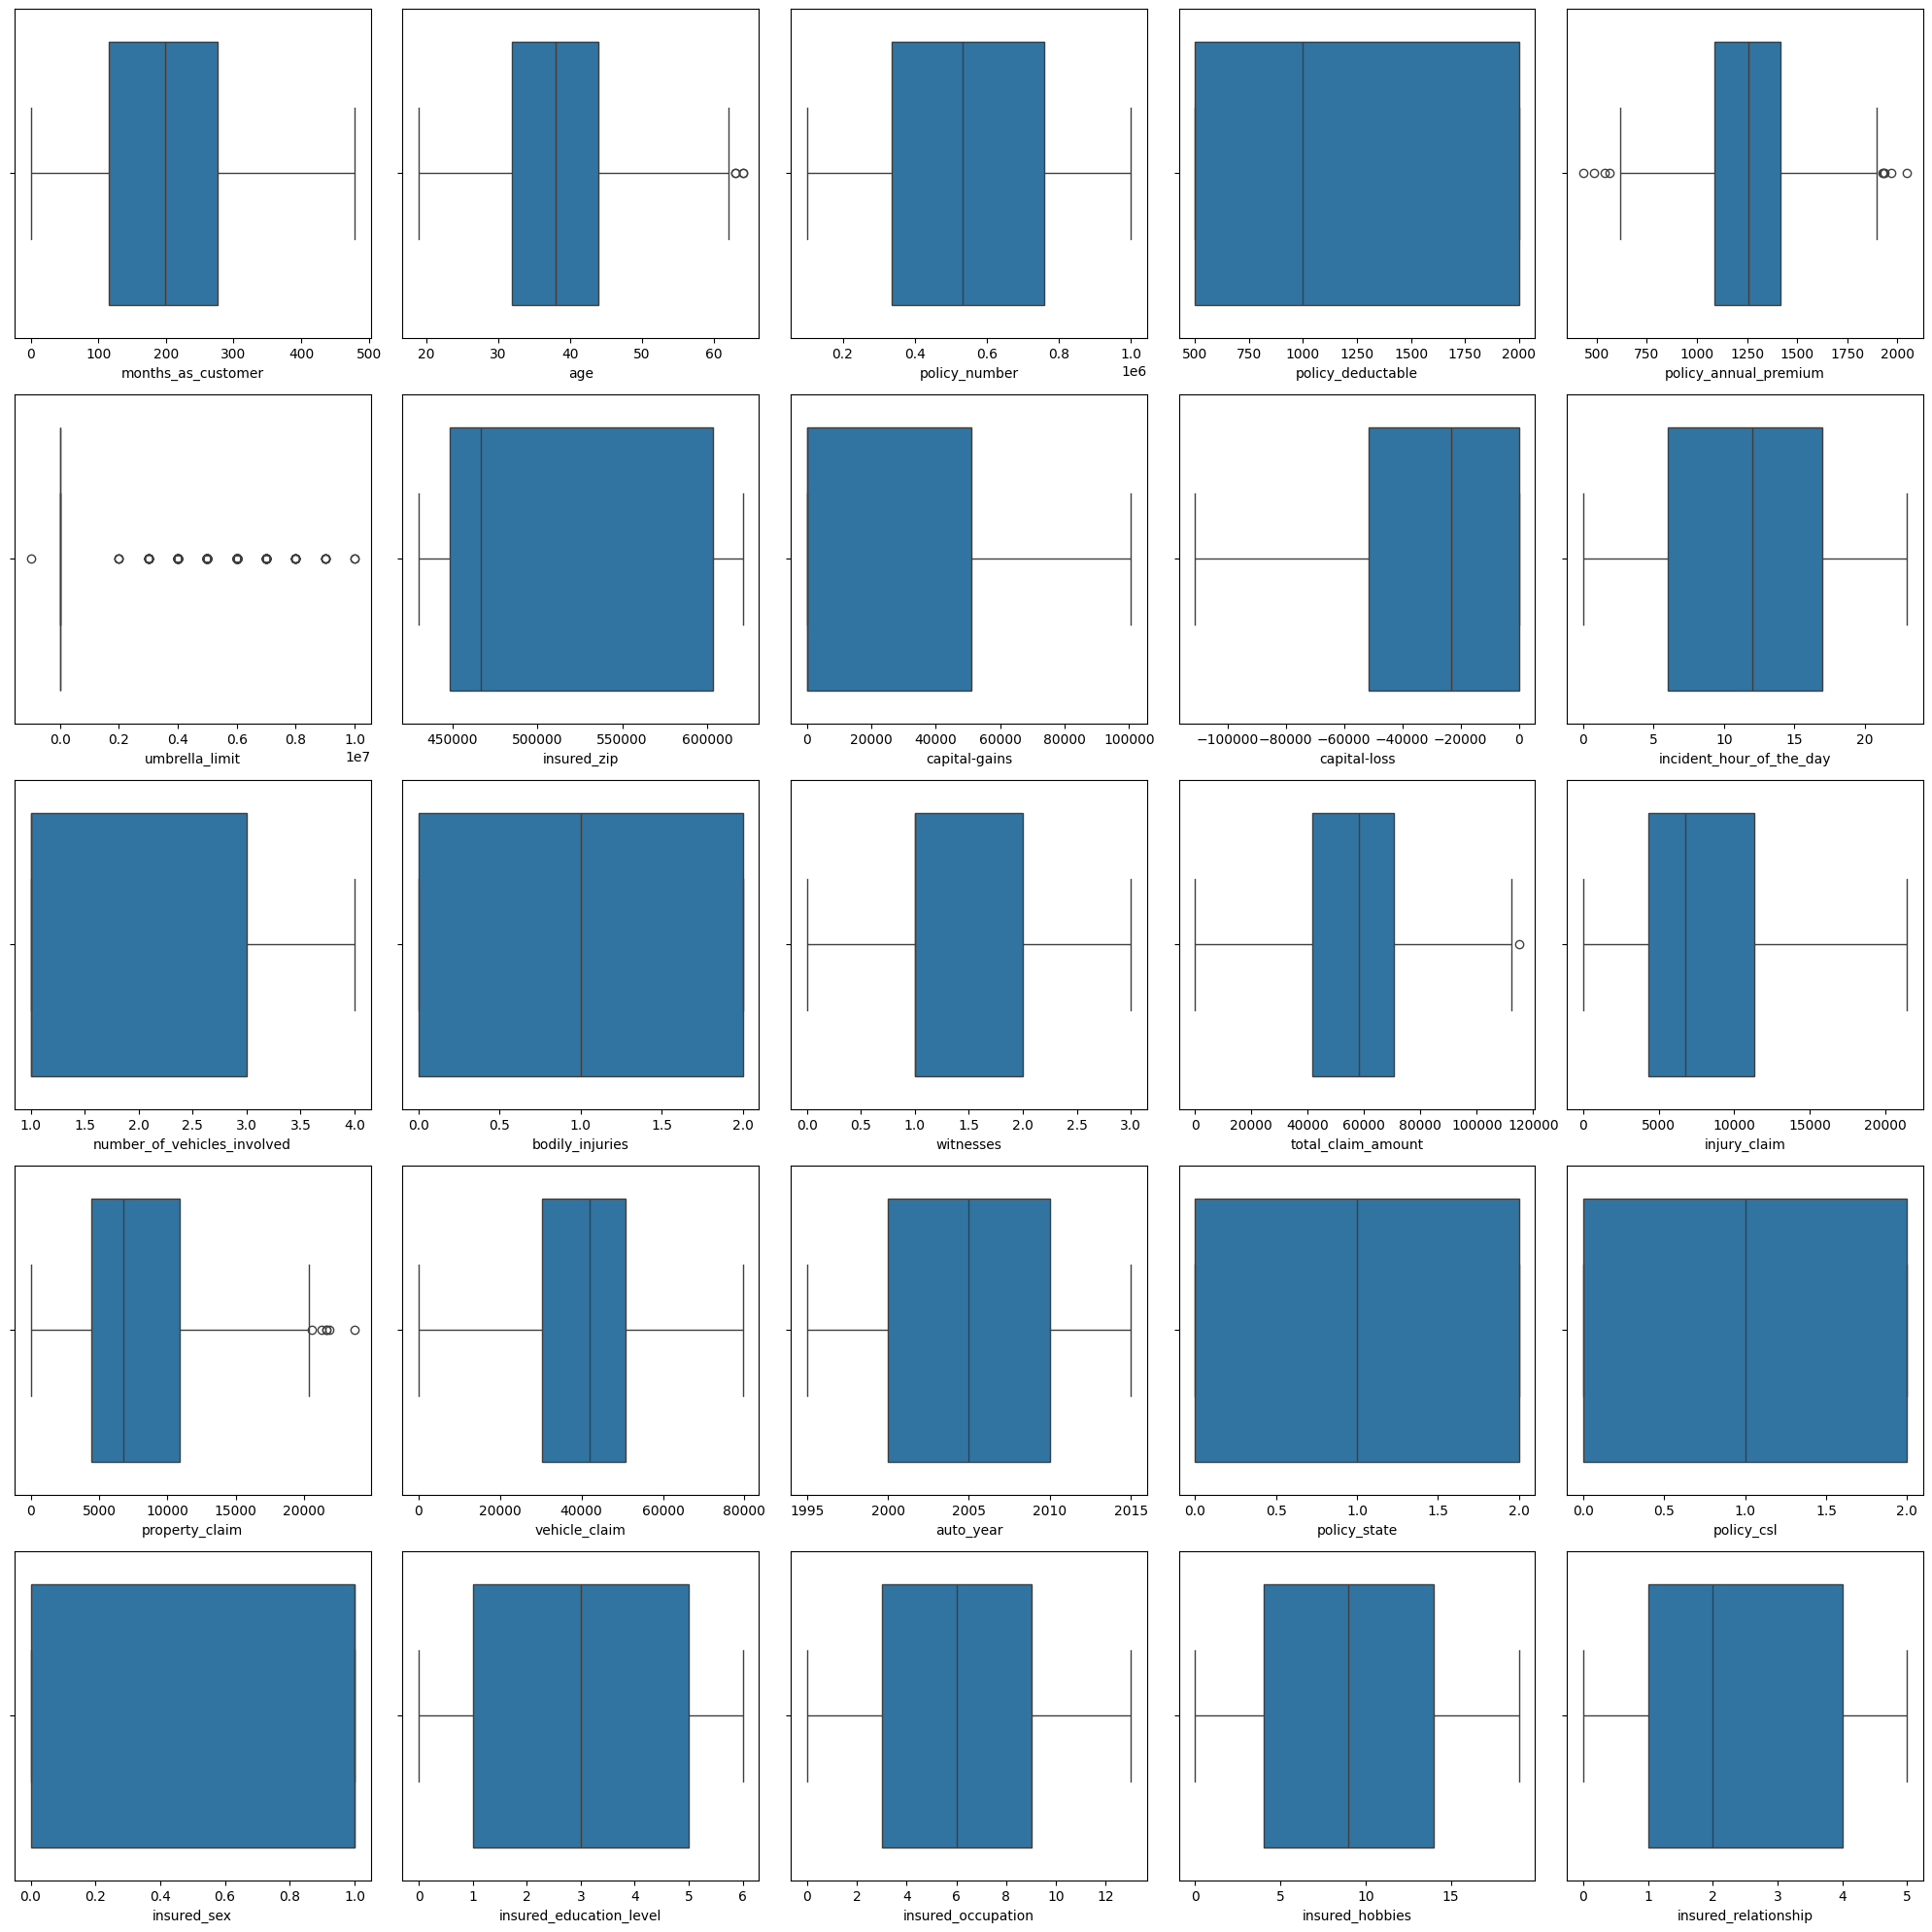

In [38]:
plt.figure(figsize=(20, 20))

# How many boxplots to show in grid
plotnumber = 1

# Loop through each numerical column
for col in all_numerical.columns:
    if plotnumber <= 25:  # 5x5 grid
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(x=all_numerical[col], ax=ax)
        plt.xlabel(col, fontsize=10)
        plotnumber += 1

plt.tight_layout()
plt.show()

In [40]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(all_numerical, y, test_size = 0.25)

NameError: name 'y' is not defined